In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
dataset = pd.read_csv('/content/sample_data/insurance.csv')

Number of rows and columns in the dataset.

In [ ]:
print(dataset.shape)

(1338, 7)


Information on the dataset.

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


First 5 entries of the dataset

In [ ]:
print(dataset.head(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
print(dataset.isna().sum())
#.sum() returns the sum over the requested data. Since all values of .isna() return false, our sums are 0 too.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


We have verified that there are no missing data points/values from our data set.

In [ ]:
dataset.describe()
#Generates basic statistics for all the numerical variables.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Distribution plot of the age distribution.

Text(0.5, 1.0, 'Age Distribution')

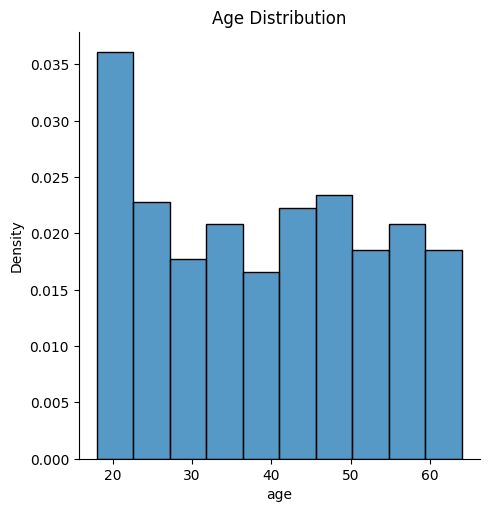

In [ ]:
sns.displot(dataset, x = 'age', stat = 'density', bins = 10) #bins = number of bars in graph
plt.title('Age Distribution')

Count plot of the gender distribution.

Text(0.5, 1.0, 'Gender Distribution')

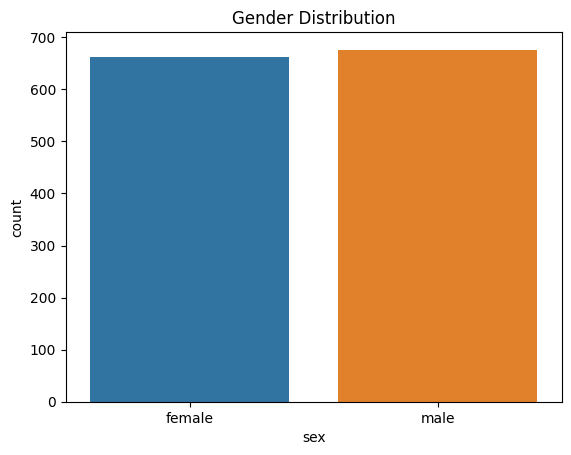

In [ ]:
sns.countplot(dataset, x = 'sex')
plt.title('Gender Distribution')

Distribution plot of BMI.

Text(0.5, 1.0, 'BMI Distribution')

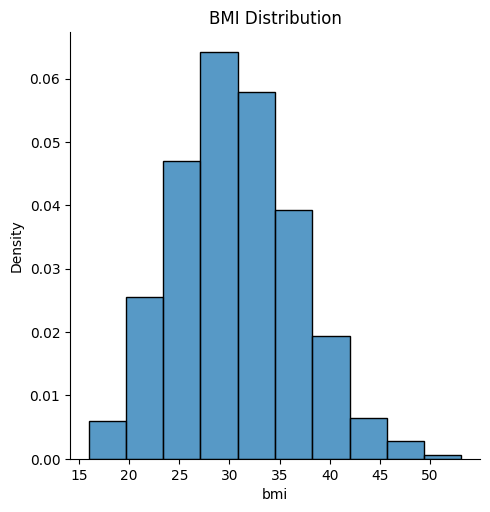

In [ ]:
sns.displot(dataset, x = 'bmi', stat = 'density', bins = 10) #bins = number of bars in graph
plt.title('BMI Distribution')

Countplot of children distribution.

Text(0.5, 1.0, 'Children Distribution')

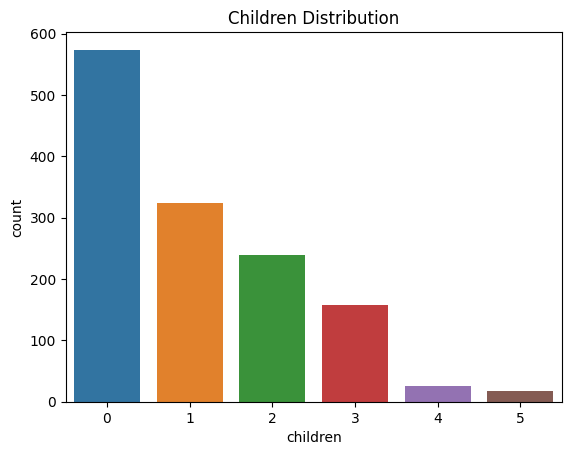

In [ ]:
sns.countplot(dataset, x = 'children') #bins = number of bars in graph
plt.title('Children Distribution')

Count plot of smoker distribution.

Text(0.5, 1.0, 'Smoker Distribution')

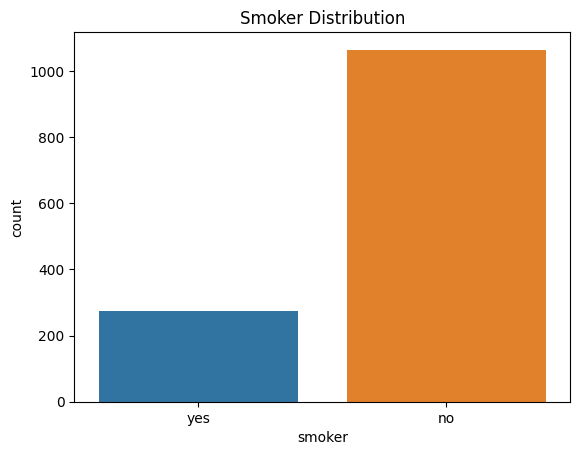

In [ ]:
sns.countplot(dataset, x = 'smoker')
plt.title('Smoker Distribution')

Countplot of region (within U.S) distribution.

Text(0.5, 1.0, 'Region Distribution')

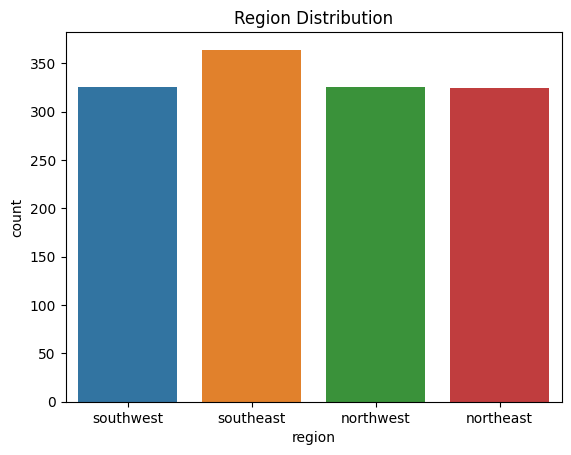

In [ ]:
sns.countplot(dataset, x = 'region')
plt.title('Region Distribution')

Text(0.5, 1.0, 'Cost Distribution')

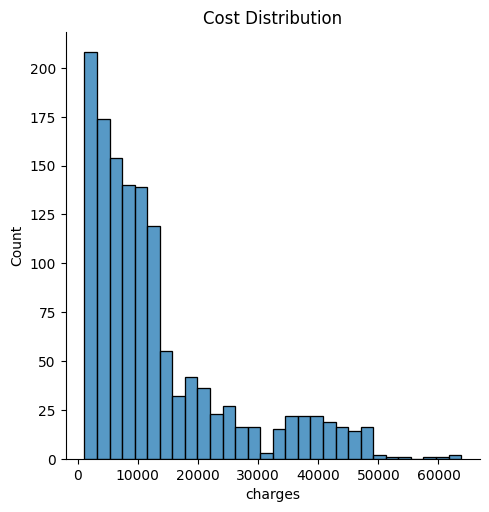

In [ ]:
sns.displot(dataset, x = 'charges')
plt.title('Cost Distribution')

Changing the categorical variable values from string (ex: male, female, yes, no) to float (0, 1, etc.) because we have to numerically plot the line of best fit for the linear regression model.

In [ ]:
dataset.replace({'smoker':{'no': 0, 'yes': 1}}, inplace = True)
dataset.replace({'sex':{'male': 0, 'female': 1}}, inplace = True)
dataset.replace({'region':{'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}}, inplace = True)

Seperating the target variable (cost) from the feature variables (everything else)

In [ ]:
x = dataset.drop('charges', axis = 1)
y = dataset['charges']

Splitting data to train and test.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Training the linear regression model.

In [ ]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

Model predicts the costs using the training data and uses metrics from sklearn to calculate the coefficient of determination (R^2)

In [ ]:
train_data_predic = linreg.predict(x_train)
r2_train = metrics.r2_score(y_train, train_data_predic)
print('R^2: ', r2_train)

R^2:  0.7358106111799123


The same is done with the testing data (data not seen by our linreg model).

In [ ]:
test_data_predic = linreg.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_predic)
print('R^2: ', r2_test)

R^2:  0.7968371572883889


In [ ]:
test = (19, 2, 25.9, 0, 0, 0)
test_np = np.asarray(test).reshape(1, -1)
predic = linreg.predict(test_np)
print(predic)

[1031.3547168]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
